# TITANIC SURVIVAL PREDICTION

## Necessary Imports

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Import

In [27]:
df = pd.read_csv("/content/tested.csv")

In [28]:
# Overview of Data

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [29]:
df.shape

(418, 12)

In [30]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- **Survived:**	Survival	0 = No, 1 = Yes
- **Pclass**:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- **Sex**: Sex
- **Age**:	Age in years
- **SibSp**:	# of siblings / spouses aboard the Titanic
- **Parch**:	# of parents / children aboard the Titanic
- **Ticket**:	Ticket number
- **Fare**:	Passenger fare
- **Cabin**:	Cabin number
- **Embarked**:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [32]:
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

We dropped PassengerID, Ticker and Name columns because we want to make a model which will predict the survival without knowing identity.

## Checking for null and duplicate values

In [33]:
# Null

df.isnull().sum() / df.shape[0] * 100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Fare         0.239234
Cabin       78.229665
Embarked     0.000000
dtype: float64

- Age: We'll impute the null values from age column from mean
- Fare: We'll use same mean imputation for Fare column
- Cabin: We'll drop cabin column as 75% data is missing

In [34]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

df.drop(["Cabin"], axis=1, inplace=True)

In [35]:
# Duplicates

df.duplicated().sum()

38

We will drop any duplicate if it's there

In [36]:
df.drop_duplicates(inplace=True)

## EDA

### Statistcs of Numerical Features

In [37]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,0.378947,2.218421,30.316606,0.484211,0.431579,38.146300
std,0.485765,0.851618,13.225585,0.925889,1.021176,57.944546
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,0.000000,0.000000,7.925000
50%,0.000000,2.000000,30.000000,0.000000,0.000000,15.372900
75%,1.000000,3.000000,36.125000,1.000000,0.000000,36.813550
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Difference in the Mean and Median shows the possibilities of potential outliers in the Column.

### Distribution of Categorical columns and label

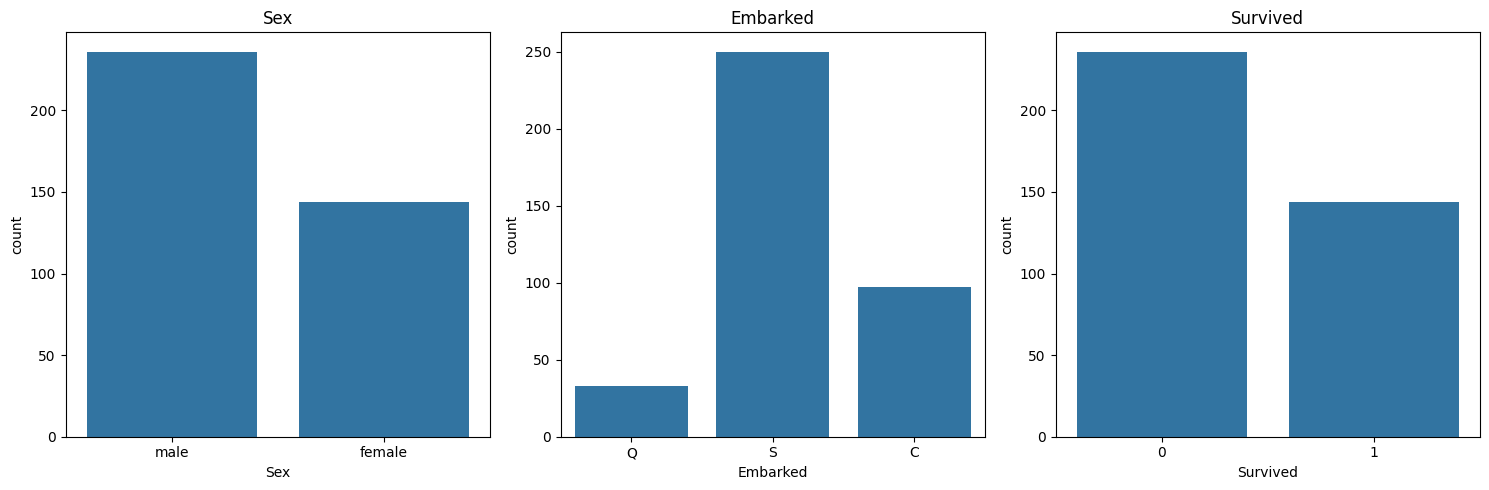

In [43]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax = ax.flatten()

sns.countplot( x = "Sex", data=df, ax=ax[0]).set_title("Sex")
sns.countplot( x = "Embarked", data=df, ax=ax[1]).set_title("Embarked")
sns.countplot( x = "Survived", data=df, ax=ax[2]).set_title("Survived")

fig.tight_layout()
plt.show()

### Distribution of Numerical Columns

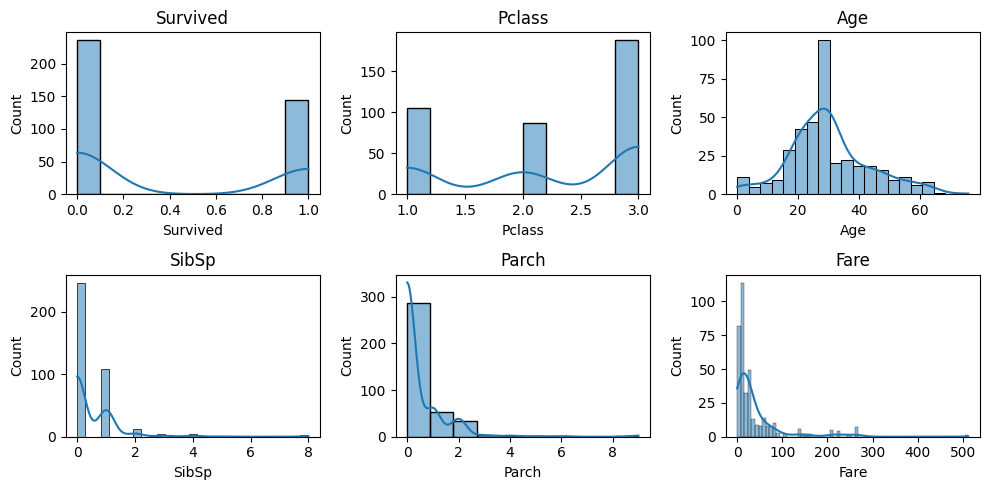

In [47]:
fig, ax = plt.subplots(2, 3, figsize = (10, 5))
ax = ax.flatten()

count = 0
for i in df.select_dtypes("number").columns:
  sns.histplot( x = i, data=df, ax=ax[count], kde=True).set_title(i)
  count += 1

fig.tight_layout()
plt.show()

### Outlier Detection

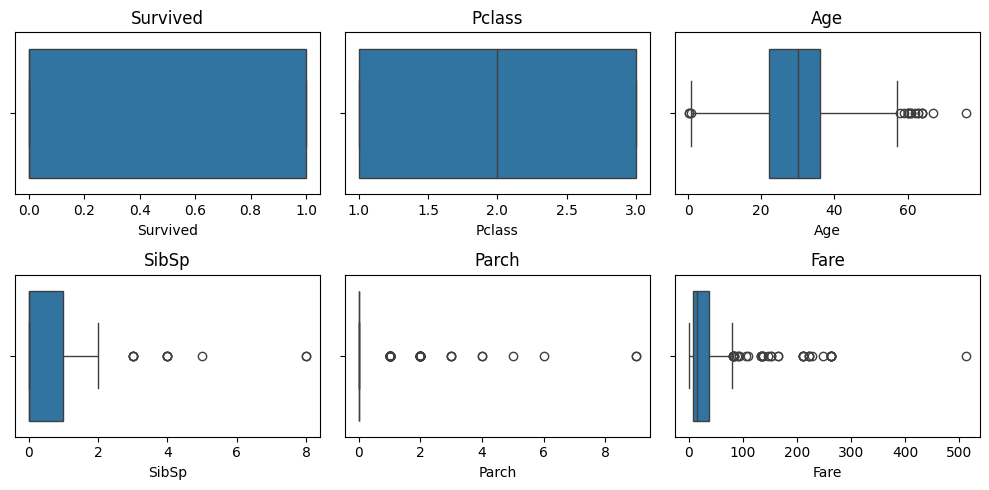

In [50]:
fig, ax = plt.subplots(2, 3, figsize = (10, 5))
ax = ax.flatten()

count = 0
for i in df.select_dtypes("number").columns:
  sns.boxplot( x = i, data=df, ax=ax[count]).set_title(i)
  count += 1

fig.tight_layout()
plt.show()

We'll remove any possible outlier using IQR method

In [51]:
for i in df.select_dtypes("number").columns:
  q3 = df[i].quantile(0.75)
  q1 = df[i].quantile(0.25)
  IQR = q3 - q1

  upper_limit = q3 + 1.5 * IQR
  lower_limit = q1 - 1.5 * IQR

  df = df[(df[i] >= lower_limit) & (df[i] <= upper_limit)]

### Correlation of Numeric columns with label

<Axes: >

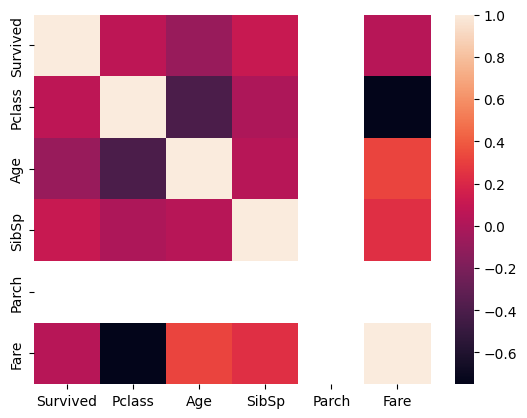

In [55]:
sns.heatmap(df.corr())

In [56]:
df.drop(["Parch"], axis=1, inplace=True)

### Encoding of Categories

Now we'll convert Categorical Columns into numerical features using One Hot Encoding method

In [57]:
df = pd.get_dummies(df, columns = df.select_dtypes("object").columns)

In [58]:
df.drop(df.select_dtypes("object").columns, inplace=True)

In [59]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

## Preprocessing

In [60]:
#Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

### Scaling

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Power Transformation

In [62]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

X_train = pt.fit_transform(X_train + 0.0000001)
X_test = pt.transform(X_test + 0.00000001)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
rf = RandomForestClassifier()

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
from sklearn.metrics import f1_score
y_pred = lr.predict(X_test)

f1_score(y_test, y_pred)

1.0

In [65]:
y_pred = rf.predict(X_test)

f1_score(y_test, y_pred)

1.0

In [70]:
from sklearn.model_selection import cross_val_score

print("Random Forest Cross-validation F1 Score:", cross_val_score(rf, X_train, y_train, cv=10, scoring="f1").mean())

print("Logistic Regression Cross-validation F1 Score:", cross_val_score(lr, X_train, y_train, cv=10, scoring="f1").mean())

Random Forest Cross-validation F1 Score: 1.0
Logistic Regression Cross-validation F1 Score: 1.0


Both the Random Forest Classifier and Logistic Regression models demonstrated excellent performance on the Titanic Survival Data, achieving perfect F1 scores during cross-validation. These results indicate that both models were able to effectively learn patterns in the data and accurately predict survival outcomes for passengers aboard the Titanic. However, it's important to note that while the F1 score is a useful metric for evaluating model performance, additional analysis and validation may be necessary to ensure the robustness and generalizability of the models.